## <center>Lineáris egyenletrendszerek</center>

### Direkt megoldási módszerek

<br>
<b>1.feladat.</b> Határozzuk meg az alábbi 

$$
A=\begin{pmatrix}
-4 & 1 & -1 \\
-1 & 4 & -1\\
1 & 1 & 4
\end{pmatrix}
$$



mátrix LU-felbontását!

In [8]:
A = [-4 1 -1; -1 4 -1; 1 1 4];
U = [-4 1 -1; 0 15/4 -3/4; 0 0 4];
L = [1 0 0; 1/4 1 0; -1/4 1/3 1];
kezi_felbontas_ellenorzes = L*U

display('A beepitett lu(A) paranccsal:')
[l, u] = lu (A)
eredmeny = l*u

kezi_felbontas_ellenorzes =

  -4   1  -1
  -1   4  -1
   1   1   4

A beepitett lu(A) paranccsal:
l =

   1.00000   0.00000   0.00000
   0.25000   1.00000   0.00000
  -0.25000   0.33333   1.00000

u =

  -4.00000   1.00000  -1.00000
   0.00000   3.75000  -0.75000
   0.00000   0.00000   4.00000

eredmeny =

  -4   1  -1
  -1   4  -1
   1   1   4



<br>
<b>2.feladat.</b> Határozzuk meg az alábbi 

$$
A=\begin{pmatrix}
5 & 7 & 3 \\
7 & 11 & 2\\
3 & 2 & 6
\end{pmatrix}
$$



mátrix Cholesky-felbontását!

In [9]:
% Cholesky felbontashoz: szimmetria (A'=A) es A szig. poz. def (eig(A) pozitiv)

A = [5 7 3; 7 11 2; 3 2 6];
U = [5 7 3; 0 6/5 -11/5; 0 0 1/6];
L = [1 0 0; 7/5 1 0; 3/5 -11/6 1];
L_hullam = [sqrt(5) 0 0; sqrt(5)*7/5 sqrt(6/5) 0; sqrt(5)*3/5 -sqrt(6/5)*11/6 sqrt(1/6)];

kezi_felbontas_ellenorzes = L_hullam*L_hullam'

display('A beepitett chol(A) paranccsal:')


cholesky = chol(A,'lower') % L_hullam
eredmeny = cholesky*cholesky'

kezi_felbontas_ellenorzes =

    5.0000    7.0000    3.0000
    7.0000   11.0000    2.0000
    3.0000    2.0000    6.0000

A beepitett chol(A) paranccsal:
cholesky =

   2.23607   0.00000   0.00000
   3.13050   1.09545   0.00000
   1.34164  -2.00832   0.40825

eredmeny =

    5.0000    7.0000    3.0000
    7.0000   11.0000    2.0000
    3.0000    2.0000    6.0000



   2.00   0.00
   4.00   0.00
   8.00   0.00
   16.00    0.00
   32.00    0.00
   64.00    0.00
   128.00     0.00
   256.00     0.00
   512.00     0.01
   1024.00      0.08
   2048.00      0.36
   4096.00      2.10
   8192.00     13.90


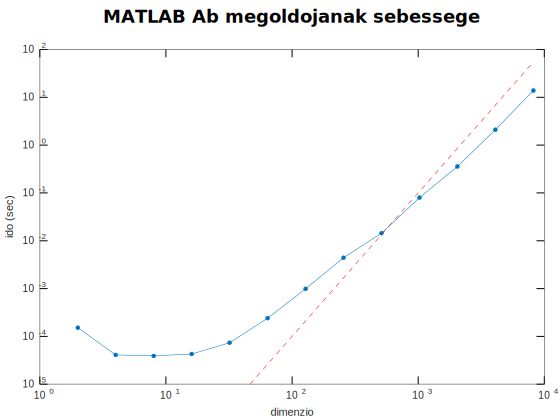

In [11]:
format bank
for j=1:13
    N=2^j;
    A=randn(N);
    %e=ones(N,1);
    %A=(N+1)^2*spdiags([-e 2*e e], [-1 0 1], N, N);
    tic
    A\ones(N,1);
    t=toc;
    disp([N,t]);
    dim(j)=N;
    time(j)=t;
end
plot(dim,time,'-')
loglog(dim,time,'.-')
hold on 
loglog(dim,1e-10*dim.^3, 'r--')
ylim([1e-5 1e2])
xlabel('dimenzio')
ylabel('ido (sec)')
title('MATLAB A\b megoldojanak sebessege','fontsize',18)
% gtext('N^3','fontsize',18,'color','k') % Akinek van MATLAB-ja

### Klasszikus iterációk (Jacobi, GS, SOR)

<br>
Tekintsük az $Ax=b$ egyenlet megoldására az alábbi egylépéses stacionárius lineáris iteratív alakot

$$x^{(k+1)}=Mx^{(k)}+v,\ \quad k=0,1,\ldots$$<br>

<u>Tétel:</u> A lineáris iteráció konzisztens $Ax=b$-vel $\Longleftrightarrow$ $\rho(M)<1$<br>

Tekintsük a szokásos $A=L+D+U$ felbontást (szig. alsó, diag, szig. felső). Ekkor a három klasszikus iteráció:

+ Jacobi
$$x^{(k+1)}=D^{-1}\big(-[L+U]x^{(k)}+b\big)$$
+ Gauss-Seidel (GS)
$$x^{(k+1)}=(L+D)^{-1}\big(-Ux^{(k)}+b\big)$$
+ SOR (Successive over-relaxation)
$$x^{(k+1)}=(D+\omega L)^{-1}\big(-[\omega U+(\omega -1)D]x^{(k)}+\omega b\big)$$
<br>

<u>Tétel:</u> Ha $A$ M-mátrix, akkor a Jacobi, GS iterációk és ezek relaxált változatai $\omega\in (0,1)$ mellett tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához<br>

<u>Tétel:</u> Ha $A$ SZDD, akkor a Jacobi és GS iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához<br>

<u>Tétel:</u> Ha $A$ SZPD, akkor a GS iteráció és SOR módszer $\omega\in (0,2)$ iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához <br>

<br>
<b>3.feladat.</b> Írjunk olyan programokat, amely az $Ax=b$ egyenletet megoldja a Jacobi-, Guass-Seidel- és SOR-iterációk segítségével! Az első leállási feltételnek a numerikus megoldó vektor maximumnormában mért relatív hibáját adjuk meg adott tolerancia mellett. Második leállási feltételnek pedig egy maximális iteráció számot. Kísérletezzünk, hogy melyik módszer hogyan viselkedik különböző tolerancia mellett futási időket tekintve!

In [18]:
format long
N=32;
e=ones(N,1);
%A=%(N+1)^2*spdiags([-e 2*e -e],[-1 0 1],N,N);
A=spdiags([-e 2*e -e],[-1 0 1],N,N);
b=e;
x0=zeros(length(b),1);
x0(end)=0.01;
[x,it] = jacobi(A,b,x0,10^(-4),10000);
it
x

% y = A\b %% MATLAB backslah ellenorzes

it =  854
x =

   1.572179338934452e+01
   3.044610580638946e+01
   4.417543527979852e+01
   5.691223079210345e+01
   6.865887908761052e+01
   7.941767059116479e+01
   8.919079449943388e+01
   9.798029989780547e+01
   1.057880993118642e+02
   1.126159264284441e+02
   1.184653479781918e+02
   1.233377195896279e+02
   1.272342055725390e+02
   1.301557345013672e+02
   1.321030261836875e+02
   1.330765485789011e+02
   1.330765509765426e+02
   1.321030238077745e+02
   1.301557368340798e+02
   1.272342033042251e+02
   1.233377217730993e+02
   1.184653458994570e+02
   1.126159283837548e+02
   1.057880974978356e+02
   9.798030155428128e+01
   8.919079301567106e+01
   7.941767188893209e+01
   6.865887798773630e+01
   5.691223168425361e+01
   4.417543460356171e+01
   3.044610626067487e+01
   1.572179316118375e+01



In [19]:
N=2^8;
e=ones(N,1);
A=(N+1)^2*spdiags([-e 2*e -e],[-1 0 1],N,N);
b=e;
x0=zeros(length(b),1);
x0(end)=0.01;
for j=1:4
    tic
    [x,it] = jacobi(A,b,x0,10^(-j),10000);
    Jacobi_iteracio(j)=it;
    xmatlab=A\b;
    Jacobi_differencia(j)=norm(x-xmatlab,inf);
    Jacobi_ido(j)=toc;
end
Jacobi_iteracio
Jacobi_ido

Jacobi_iteracio =

    116    396   1564   8978

Jacobi_ido =

 Columns 1 through 3:

   3.388595581054688e-02   2.840960025787354e-01   3.675768136978149e+00

 Column 4:

   1.106427938938141e+02



In [20]:
N=2^8;
e=ones(N,1);
A=(N+1)^2*spdiags([-e 2*e -e],[-1 0 1],N,N);
b=e;
x0=zeros(length(b),1);
x0(end)=0.01;
for j=1:4
    tic
    [x,it] = gaussseidel(A,b,x0,10^(-j),10000);
    GS_iteracio(j)=it;
    xmatlab=A\b;
    GS_differencia(j)=norm(x-xmatlab,inf);
    GS_ido(j)=toc;
end
GS_iteracio
GS_ido

GS_iteracio =

     10    102    996   6329

GS_ido =

 Columns 1 through 3:

   1.410961151123047e-03   6.089115142822266e-02   1.594121932983398e+00

 Column 4:

   5.844128704071045e+01



In [21]:
N=2^8;
e=ones(N,1);
A=(N+1)^2*spdiags([-e 2*e -e],[-1 0 1],N,N);
b=e;
x0=zeros(length(b),1);
x0(end)=0.01;
omega=2/(1+sin(pi/(N+1)));
for j=1:4
    tic
    [x,it] = SOR(A,b,x0,omega,10^(-j),10000);
    SOR_iteracio(j)=it;
    xmatlab=A\b;
    SOR_differencia(j)=norm(x-xmatlab,inf);
    SOR_ido(j)=toc;
end
SOR_iteracio
SOR_ido



SOR_iteracio =

    56   200   259   338

SOR_ido =

 Columns 1 through 3:

   2.341103553771973e-02   7.944297790527344e-02   1.773390769958496e-01

 Column 4:

   2.630808353424072e-01

